# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fitting a Line

In [2]:
## Reading housing data-file
housing = pd.read_csv('housing.csv')
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
## Defining the input and target variables 
X = housing[['RM', 'LSTAT', 'PTRATIO']]
Y = housing['MEDV']

## Fitting the linear regression model 
lm_md = LinearRegression().fit(X, Y)

## Extracting model parameters
lm_md.coef_

array([ 86565.23613299, -10849.34038381, -19492.11563515])

In [4]:
## Extracting model intercept
lm_md.intercept_

415464.3965167299

# Predicting with Linear Model

In [5]:
## Once we have a fitted linear model, we can use it to make predictions
## Let's assume the following: RM = 6.5, LSTAT = 15, PTRATIO = 13. 
## Let's use the model to predict the MEDV
new_data = np.array([[6.5, 15, 13]])

## Predicting the MEDV with the linear model
lm_md.predict(new_data)

array([562000.82236715])

# Exploring the Data

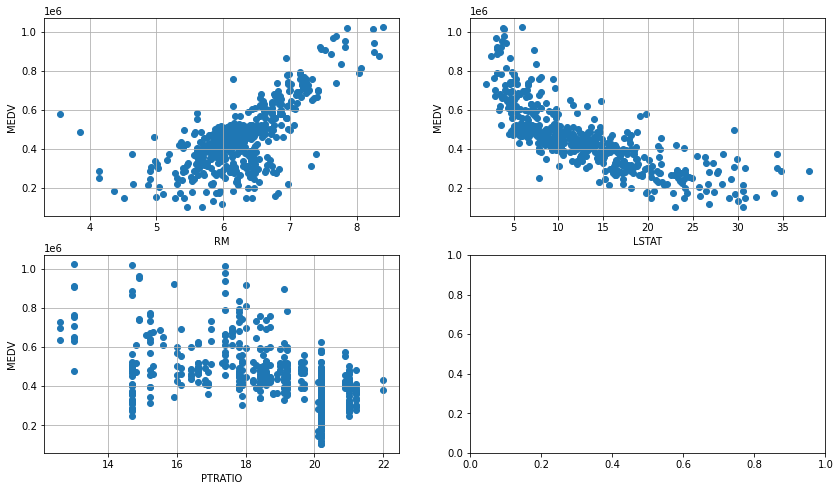

In [6]:
## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (14, 8))

axes[0, 0].scatter(housing['RM'], housing['MEDV'])
axes[0, 0].set_xlabel('RM')
axes[0, 0].set_ylabel('MEDV')
axes[0, 0].grid()

axes[0, 1].scatter(housing['LSTAT'], housing['MEDV'])
axes[0, 1].set_xlabel('LSTAT')
axes[0, 1].set_ylabel('MEDV')
axes[0, 1].grid()

axes[1, 0].scatter(housing['PTRATIO'], housing['MEDV'])
axes[1, 0].set_xlabel('PTRATIO')
axes[1, 0].set_ylabel('MEDV')
axes[1, 0].grid()

# Fitting a Nonlinear Relationship

In [7]:
## From the above plot, it's clear that the relationship between 
## LSTAT and MEDV is non-linear (1/X). Thus we create a new feature.
housing['LSTAT_new'] = 1 / housing['LSTAT']

## Fitting the new linear model 
X = housing[['RM', 'LSTAT_new', 'PTRATIO']]
Y = housing['MEDV']
lm_md = LinearRegression().fit(X, Y)

## Extracting the new coefficients
lm_md.coef_

array([  75100.85481265, 1255790.64487357,  -18456.00249122])